# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1000]:
# %pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [1001]:
# %pip install --upgrade plotly

### Import Statements

In [1002]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

#trying to use a deco
import functools

### Notebook Presentation

In [1003]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [1004]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [1005]:
df_data.shape

(4324, 9)

In [1006]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      4324 non-null   int64 
 1   Unnamed: 0.1    4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [1007]:
df_data.isna().values.any()

True

In [1008]:
df_data.duplicated().values.any()

False

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [1009]:
df_data.Date = pd.to_datetime(df_data.Date, utc=True)
df_data.Price = df_data.Price.str.replace(',', '')
df_data.Price = pd.to_numeric(df_data.Price)

In [1010]:
df_data.head()

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success


In [1011]:
df_data.isna().sum()

Unnamed: 0           0
Unnamed: 0.1         0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

In [1012]:
# df_data.dropna(inplace=True)
df_data['Price'] = df_data['Price'].fillna(0)
df_data.isna().sum()

Unnamed: 0        0
Unnamed: 0.1      0
Organisation      0
Location          0
Date              0
Detail            0
Rocket_Status     0
Price             0
Mission_Status    0
dtype: int64

In [1013]:
df_data.drop('Unnamed: 0', inplace=True, axis=1)
df_data.head()

,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,0.00,Success
3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success


In [1014]:
df_data.drop('Unnamed: 0.1', inplace=True, axis=1)
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,0.00,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [1015]:
by_org = df_data.Organisation.value_counts()
bar = px.bar(x=by_org.index, y=by_org.values, title='Number of Launches per Company', color=by_org.values)
bar.update_layout(xaxis_title='Organisation Name', yaxis_title='Number of Launches', coloraxis_showscale=False)
bar.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [1016]:
by_roekct_status = df_data.Rocket_Status.value_counts()

In [1017]:
by_roekct_status

StatusRetired    3534
StatusActive      790
Name: Rocket_Status, dtype: int64

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [1018]:
by_mission_status = df_data.Mission_Status.value_counts()

In [1019]:
by_mission_status

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [1059]:
df_histo = df_data[df_data.Price != 0]
histogram = px.histogram(df_histo,
                         x='Price',
                         color='Price',
                         nbins=30,
                         barmode='overlay',
                         opacity=1)
histogram.update_layout(xaxis_title='Cost',
                        yaxis_title='Count')
histogram.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [1021]:
df_data['ISO'] = df_data.Location.str.split(',').str[-1]
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,ISO
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,0.00,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA


In [1022]:
@functools.lru_cache(None)
def search(country):
    try:
        country = country.strip()
        if country == 'Russia' or country == 'Barents Sea':
            country = 'Russian Federation'
        elif country == 'New Mexico' or country == 'Pacific Missile Range Facility' or country == 'Gran Canaria':
            country = 'USA'
        elif country == 'Yellow Sea':
            country = 'China'
        elif country == 'Shahrud Missile Test Site':
            country = 'Iran'
        result = countries.get(country)
    except Exception:
        return np.nan
    else:
        return result[2]

In [1023]:
df_data["ISO"] = df_data["ISO"].apply(lambda country: search(country))

In [1024]:
df_data.ISO.value_counts()

RUS    1398
USA    1351
KAZ     701
FRA     303
CHN     269
JPN     126
IND      76
NZL      13
ISR      11
KEN       9
AUS       6
BRA       3
Name: ISO, dtype: int64

In [1025]:
fig = px.choropleth(locations=df_data.ISO.value_counts().index,
                    color=df_data.ISO.value_counts().values,
                    color_continuous_scale=px.colors.sequential.matter,
                    hover_name=df_data.ISO.value_counts().index,
                    title='Number of Launches by Country')
fig.update_layout(coloraxis_showscale=False)
fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [1026]:
df_countries_fail = df_data.loc[df_data['Mission_Status'] != 'Success']
df_countries_fail = df_countries_fail.groupby('ISO', as_index=False).agg({'Mission_Status': pd.Series.count})

In [1027]:
fig = px.choropleth(df_countries_fail,
                    locations='ISO',
                    color='Mission_Status',
                    color_continuous_scale=px.colors.sequential.matter,
                    hover_name='ISO',
                    title='Number of Failures by Country')
fig.update_layout(coloraxis_showscale=False)
fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [1028]:
df_sun = df_data.groupby(['ISO', 'Organisation', 'Mission_Status']).Mission_Status.count().reset_index(name='count')
fig = px.sunburst(df_sun,
                  path=['ISO', 'Organisation', 'Mission_Status'],
                  values='count',
                  title='Countries, Organisations, and Mission Status')


fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [1029]:
df_data.groupby('Organisation').Price.sum().reset_index(name='Total').sort_values('Total', ascending=False)

,Organisation,Total
35,NASA,"76,280.00"
3,Arianespace,"16,345.00"
48,ULA,"14,798.00"
40,RVSN USSR,"10,000.00"
7,CASC,"6,340.26"
46,SpaceX,"5,444.00"
36,Northrop,"3,930.00"
32,MHI,"3,532.50"
23,ISRO,"2,177.00"
49,US Air Force,"1,550.92"


# Analyse the Amount of Money Spent by Organisation per Launch

In [1030]:
df_data.groupby('Organisation').Price.mean().reset_index(name='Mean').sort_values('Mean', ascending=False)

,Organisation,Mean
35,NASA,375.76
48,ULA,105.70
3,Arianespace,58.58
46,SpaceX,54.44
36,Northrop,47.35
32,MHI,42.05
14,Eurockot,41.80
28,Kosmotras,29.00
19,ILS,28.70
23,ISRO,28.64


# Chart the Number of Launches per Year

In [1031]:
by_year = df_data.groupby(pd.DatetimeIndex(df_data['Date']).year).size().reset_index(name='count')

In [1032]:
bar = px.bar(by_year,
             x='Date',
             y='count',
             color='count',
             title='Number of Launches per Year')

bar.update_layout(coloraxis_showscale=False, xaxis_title='Year', yaxis_title='Number of Launches')
bar.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [1033]:
# roll_df = df_data.set_index(pd.DatetimeIndex(df_data['Date']).month)
# roll_df = roll_df.rolling(window=6).mean()
# roll_df = roll_df.groupby(roll_df.index).size().reset_index(name='count')
# # roll_df

In [1034]:
# bar = px.bar(roll_df,
#              x=roll_df.index,
#              y='count')
# bar.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [1035]:
by_month = df_data.groupby(pd.DatetimeIndex(df_data['Date']).month).size().reset_index(name='count')

In [1036]:
bar = px.bar(by_month,
             x='Date',
             y='count',
             color='count',
             title='Launches per Month')

bar.update_layout(coloraxis_showscale=False, xaxis_title='Month', yaxis_title='Number of Launches')
bar.show()

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [1037]:
by_year = df_data.groupby(pd.DatetimeIndex(df_data['Date']).year).Price.mean().reset_index(name='avg. Price')

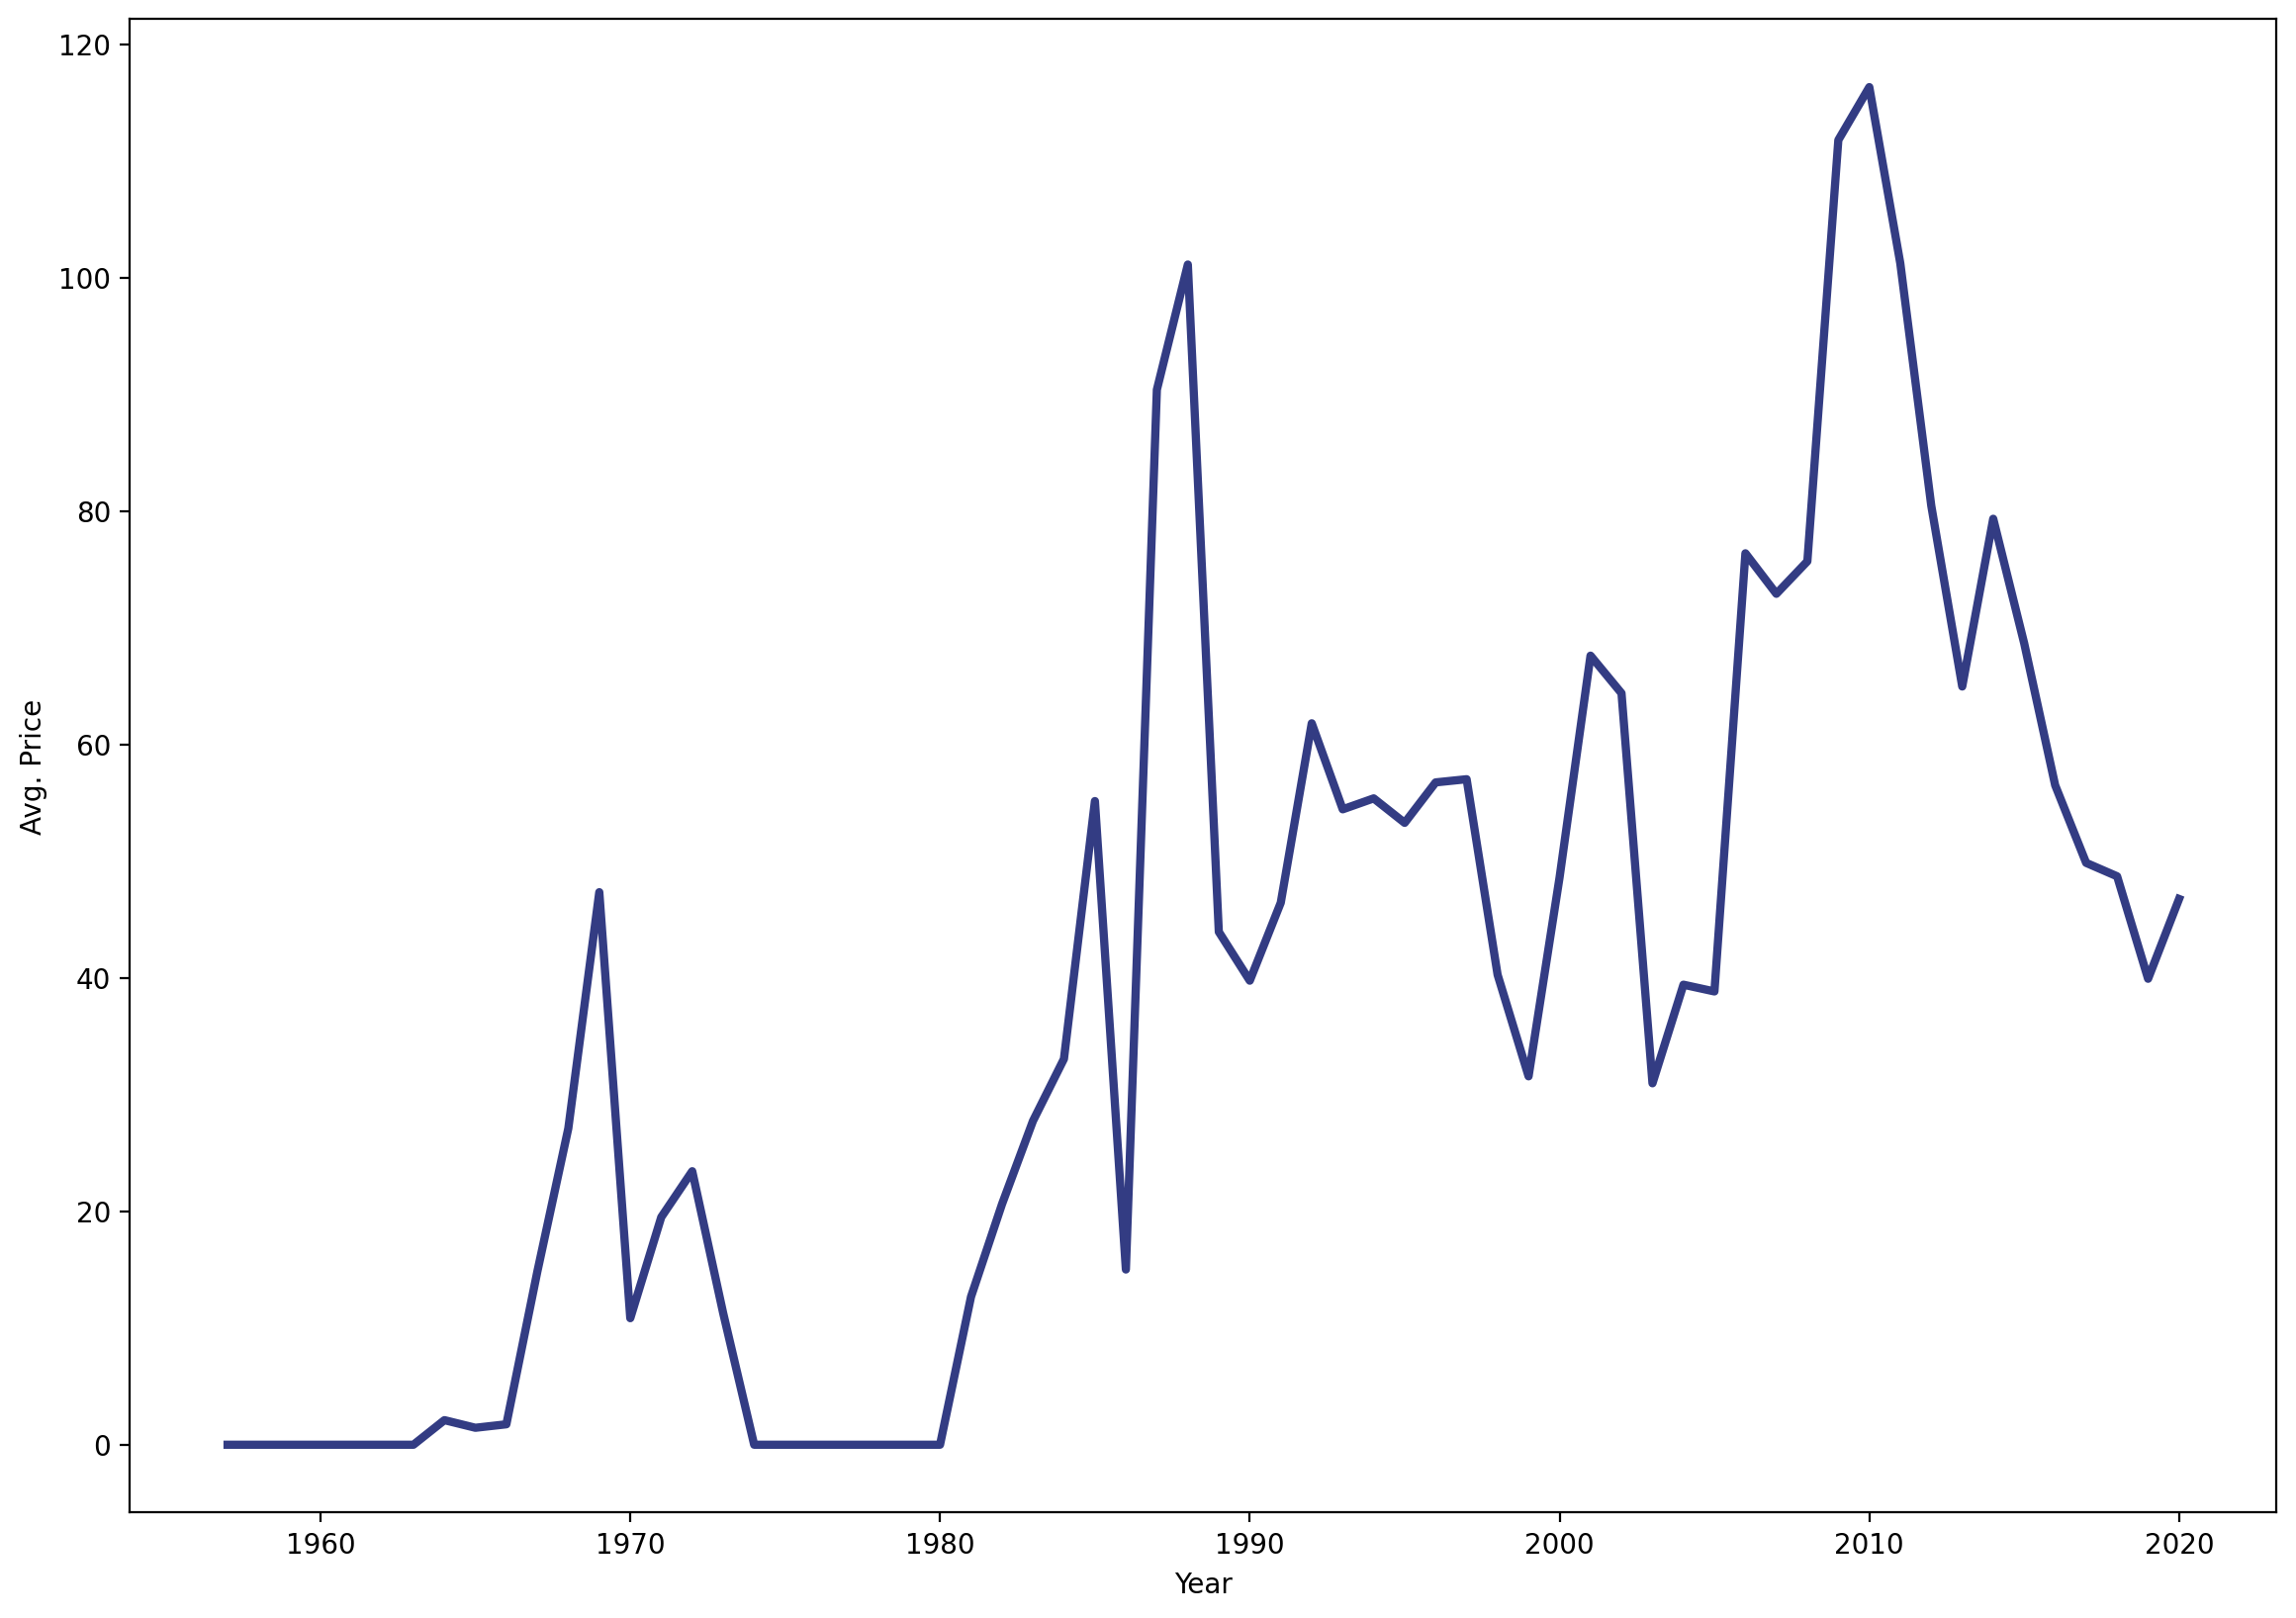

In [1038]:
plt.figure(figsize=(14,10), dpi=200)
plt.plot(by_year.Date, by_year['avg. Price'], color='#333C83', linewidth=3)
plt.xlabel('Year')
plt.ylabel('Avg. Price')
plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [1039]:
top_10org = df_data.groupby(['Organisation', pd.DatetimeIndex(df_data['Date']).year]).size().reset_index(name='count')
temp = df_data.groupby('Organisation').size().reset_index(name='count').sort_values('count', ascending=False)[:10]
top_10org_list = []
for index, row in temp.iterrows():
    top_10org_list.append(row['Organisation'])
top_10org = top_10org[top_10org.Organisation.isin(top_10org_list)]

In [1040]:
chart = px.line(top_10org,
                x='Date',
                y='count',
                color='Organisation',
                title='Number of Launches over Time by the Top 10 Organisations')
chart.update_layout(xaxis_title='Year', yaxis_title='Number of Launches')
chart.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [1041]:
cold_war = df_data[df_data.ISO.isin(['RUS', 'USA', 'KAZ'])]
cold_war['Country'] = cold_war['ISO'].apply(lambda country: 'USSR' if country in ['RUS', 'KAZ'] else country)
cold_war[cold_war.Country == 'USSR']

<ipython-input-1041-26896b6a04db>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,ISO,Country
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,KAZ,USSR
6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",2020-07-23 14:26:00+00:00,Soyuz 2.1a | Progress MS-15,StatusActive,48.50,Success,KAZ,USSR
28,VKS RF,"Site 43/4, Plesetsk Cosmodrome, Russia",2020-05-22 07:31:00+00:00,Soyuz 2.1b/Fregat-M | Cosmos 2546,StatusActive,0.00,Success,RUS,USSR
33,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",2020-04-25 01:51:00+00:00,Soyuz 2.1a | Progress MS-14,StatusActive,48.50,Success,KAZ,USSR
37,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",2020-04-09 08:05:00+00:00,Soyuz 2.1a | Soyuz MS-16,StatusActive,48.50,Success,KAZ,USSR
...,...,...,...,...,...,...,...,...,...
4301,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-09-23 07:40:00+00:00,Vostok | E-1 n†­1 (Luna-1),StatusRetired,0.00,Failure,KAZ,USSR
4313,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-05-15 07:12:00+00:00,Sputnik 8A91 | Sputnik-3 #2,StatusRetired,0.00,Success,KAZ,USSR
4315,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-04-27 09:01:00+00:00,Sputnik 8A91 | Sputnik-3 #1,StatusRetired,0.00,Failure,KAZ,USSR
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,0.00,Success,KAZ,USSR


In [1042]:
cold_war_end = pd.to_datetime('1991', utc=True)
cold_war = cold_war[cold_war.Date <= cold_war_end]
cold_war = cold_war.groupby(['Country',  pd.DatetimeIndex(cold_war['Date']).year]).size().reset_index(name='Count')
cold_war

,Country,Date,Count
0,USA,1957,1
1,USA,1958,23
2,USA,1959,16
3,USA,1960,30
4,USA,1961,43
5,USA,1962,60
6,USA,1963,17
7,USA,1964,24
8,USA,1965,33
9,USA,1966,47


In [1043]:
chart = px.line(cold_war,
                x='Date',
                y='Count',
                color='Country',
                title='Cold War Space Race: USA vs USSR')
chart.update_layout(xaxis_title='Year', yaxis_title='Number of Launches')
chart.show()

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [1044]:
cold_war_pie = cold_war.groupby(['Country']).Count.sum().reset_index(name='Count')
cold_war_pie

,Country,Count
0,USA,644
1,USSR,1741


In [1045]:
fig = px.pie(labels=cold_war_pie.Country,
             values=cold_war_pie.Count,
             title='Total Number of Launches of the USSR and the USA',
             names=cold_war_pie.Country)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [1046]:
bar = px.bar(cold_war,
             x='Date',
             y='Count',
             color='Country',
             title='Total Number of Launches Year-On-Year by the Two Superpowers')
bar.update_layout(xaxis_title='Year', yaxis_title='Number of Launches')
bar.show()

## Chart the Total Number of Mission Failures Year on Year.

In [1047]:
fail_by_year = df_data
fail_by_year.Date = pd.DatetimeIndex(fail_by_year.Date).year
fail_by_year = fail_by_year[fail_by_year.Mission_Status != 'Success']

In [1048]:
fail_by_year = fail_by_year.groupby('Date').size().reset_index(name='FCount')

In [1049]:
bar = px.bar(fail_by_year,
             x='Date',
             y='FCount',
             color='FCount',
             title='Total Number of Mission Failures Year on Year')
bar.update_layout(xaxis_title='Year', yaxis_title='Number of Mission Failures', coloraxis_showscale=False)
bar.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [1050]:
success_by_year = df_data
success_by_year = success_by_year[success_by_year.Mission_Status == 'Success']
success_by_year

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,ISO
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020,Starship Prototype | 150 Meter Hop,StatusActive,0.00,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA
...,...,...,...,...,...,...,...,...
4316,AMBA,"LC-5, Cape Canaveral AFS, Florida, USA",1958,Juno I | Explorer 3,StatusRetired,0.00,Success,USA
4317,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958,Vanguard | Vanguard 1,StatusRetired,0.00,Success,USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958,Juno I | Explorer 1,StatusRetired,0.00,Success,USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957,Sputnik 8K71PS | Sputnik-2,StatusRetired,0.00,Success,KAZ


In [1051]:
success_by_year = success_by_year.groupby('Date').size().reset_index(name='SCount')
success_by_year

,Date,SCount
0,1957,2
1,1958,6
2,1959,8
3,1960,19
4,1961,32
5,1962,65
6,1963,29
7,1964,48
8,1965,74
9,1966,81


In [1052]:
merged_f_s = pd.merge(fail_by_year, success_by_year, on='Date')
merged_f_s['Fpercentage'] = merged_f_s['FCount']/(merged_f_s['SCount']+merged_f_s['FCount']) * 100
merged_f_s

,Date,FCount,SCount,Fpercentage
0,1957,1,2,33.33
1,1958,22,6,78.57
2,1959,12,8,60.00
3,1960,20,19,51.28
4,1961,20,32,38.46
5,1962,17,65,20.73
6,1963,12,29,29.27
7,1964,12,48,20.00
8,1965,13,74,14.94
9,1966,20,81,19.80


In [1053]:
bar = px.bar(merged_f_s,
             x='Date',
             y='Fpercentage',
             color='Fpercentage',
             title='Percentage of Failures over Time')
bar.update_layout(xaxis_title='Year', yaxis_title='Percentage of Failures', coloraxis_showscale=False)
bar.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [1054]:
lead_country_by_year = df_data.groupby(['Date', 'ISO']).size().reset_index(name='Count')
lead_country_by_year

,Date,ISO,Count
0,1957,KAZ,2
1,1957,USA,1
2,1958,KAZ,5
3,1958,USA,23
4,1959,KAZ,4
5,1959,USA,16
6,1960,KAZ,9
7,1960,USA,30
8,1961,KAZ,7
9,1961,RUS,2


In [1055]:
lead_country_by_year.groupby(['Date', 'ISO'])['Count'].max()

Date  ISO
1957  KAZ     2
      USA     1
1958  KAZ     5
      USA    23
1959  KAZ     4
      USA    16
1960  KAZ     9
      USA    30
1961  KAZ     7
      RUS     2
      USA    43
1962  KAZ    14
      RUS     8
      USA    60
1963  KAZ    16
      RUS     8
      USA    17
1964  KAZ    28
      RUS     8
      USA    24
1965  FRA     1
      KAZ    43
      RUS    10
      USA    33
1966  FRA     1
      JPN     2
      KAZ    36
      RUS    15
      USA    47
1967  AUS     1
      FRA     2
      JPN     1
      KAZ    38
      KEN     1
      RUS    37
      USA    26
1968  AUS     1
      KAZ    40
      RUS    40
      USA    22
1969  AUS     1
      CHN     1
      JPN     1
      KAZ    38
      RUS    45
      USA    17
1970  AUS     2
      CHN     1
      FRA     2
      JPN     2
      KAZ    29
      KEN     1
      RUS    59
      USA    11
1971  AUS     1
      CHN     1
      FRA     3
      JPN     3
      KAZ    31
      KEN     2
      RUS    62
      USA    1

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [1056]:
lead_org_by_year = df_data

In [1057]:
lead_org_by_year = lead_org_by_year.groupby(['Organisation', 'Date']).size().reset_index(name='Count')

In [1058]:
bar = px.bar(lead_org_by_year,
             x='Date',
             y='Count',
             color='Organisation',
             title='Year-on-Year Number of Launches by Organisations')
bar.update_layout(xaxis_title='Year', yaxis_title='Number of Launches')
bar.show()